### Predict lat, lon, with Keras in Python

In [1]:
# Import libraris
# Import libraries
import os
import pandas            as pd
import seaborn           as sns
import numpy             as np
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.metrics.pairwise

from pandas   import read_csv
from datetime import datetime
from numpy    import reshape
from sklearn  import preprocessing



#### Define function read time

In [149]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M:%S')


#### Read crime data

In [150]:
dataset = read_csv('../data/val_crime_gridnum_closestpoi.csv', parse_dates = [['crime_date','crime_time']], index_col=0, date_parser=parse)

In [151]:
dataset

,crime_id,crime_type,muni,year,month,week,day,week_day,week_day_name,crime_hour,...,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,grid_lon,grid_lat
crime_date_crime_time,,,,,,,,,,,,,,,,,,,,,
2012-11-03 19:24:41,v19729,Agresion,Valencia,2012,11,44,308,6,Friday,19,...,17.43820,4747.5434,4587.8138,4179.4637,3955.3321,3614.2947,3820.6677,8,-0.389801,39.530316
2016-04-09 13:50:02,v46325,Sustraccion,Valencia,2016,4,15,100,6,Friday,13,...,6.82230,4750.8043,4590.5371,4184.4217,3945.2123,3614.8454,3827.7238,8,-0.389801,39.530316
2016-09-30 11:29:09,v50637,Sustraccion,Valencia,2016,9,40,274,5,Thursday,11,...,16.31740,4755.5642,4595.0683,4189.8992,3943.6966,3618.4390,3834.0585,8,-0.389801,39.530316
2019-11-12 09:06:17,v82815,Sustraccion,Valencia,2019,11,46,316,2,Monday,9,...,7.84373,4750.1360,4590.1877,4182.7390,3952.2821,3615.7757,3824.7780,8,-0.389801,39.530316
2010-04-29 15:29:24,v1187,Agresion,Valencia,2010,4,17,119,4,Wednesday,15,...,37.54220,4839.5899,4684.4022,4257.7843,4137.6026,3729.0027,3880.8419,9,-0.384235,39.530316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-04 02:33:38,v82581,Agresion,Valencia,2019,11,44,308,1,Sunday,2,...,1282.79390,2957.3901,4021.2162,4366.1619,2541.6292,181.1147,3832.9386,398,-0.334142,39.418054
2019-11-15 20:00:38,v82876,Sustraccion,Valencia,2019,11,46,319,5,Thursday,20,...,1641.86980,3252.3047,4326.1528,4639.1413,2891.5102,356.7806,4179.9679,398,-0.334142,39.418054
2020-01-19 15:50:58,v84703,Agresion,Valencia,2020,1,3,19,7,Saturday,15,...,1641.86980,3252.3047,4326.1528,4639.1413,2891.5102,356.7806,4179.9679,398,-0.334142,39.418054


#### Verify types columns

In [152]:
dataset.dtypes

crime_id            object
crime_type          object
muni                object
year                 int64
month                int64
week                 int64
day                  int64
week_day             int64
week_day_name       object
crime_hour           int64
crime_lon          float64
crime_lat          float64
atm_dist           float64
bank_dist          float64
bar_dist           float64
cafe_dist          float64
industrial_dist    float64
market_dist        float64
nightclub_dist     float64
police_dist        float64
pub_dist           float64
restaurant_dist    float64
taxi_dist          float64
grid_id              int64
grid_lon           float64
grid_lat           float64
dtype: object

#### We save the data in a new variable in order not to lose the original data

In [153]:
d_copy = dataset

In [154]:
d_copy.describe()

,year,month,week,day,week_day,crime_hour,crime_lon,crime_lat,atm_dist,bank_dist,...,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,grid_lon,grid_lat
count,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,...,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000
mean,2015.395127,6.536915,26.654991,183.550877,4.322504,12.521159,-0.372372,39.471404,790.227621,305.314730,...,675.232510,1008.414058,930.501441,875.246001,496.471830,223.875308,717.380553,210.777699,-0.372398,39.471334
std,3.041370,3.309951,14.457176,101.207035,2.043508,7.444000,0.021595,0.014917,594.453864,288.719598,...,623.298757,740.182323,679.212290,626.190985,452.372564,257.024583,481.201107,51.554858,0.021707,0.015017
min,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.429604,39.415417,1.549093,1.712670,...,0.100031,1.821200,1.189390,0.687878,1.488920,0.427386,2.441030,8.000000,-0.428762,39.418054
25%,2013.000000,4.000000,14.000000,96.000000,3.000000,5.000000,-0.388284,39.461933,380.534983,133.907500,...,268.355100,487.873600,468.163950,455.810200,190.149900,73.401100,393.438150,173.000000,-0.389801,39.459414
50%,2016.000000,7.000000,27.000000,187.000000,5.000000,14.000000,-0.374947,39.469913,630.867281,228.002800,...,509.564200,869.516500,810.185400,706.093700,383.330000,147.797000,651.643500,215.000000,-0.373103,39.471231
75%,2018.000000,9.000000,38.000000,266.000000,6.000000,19.000000,-0.359254,39.482532,986.896822,384.706000,...,909.889700,1263.404900,1256.269400,1105.625100,665.598800,272.288400,931.082700,248.000000,-0.361972,39.483048
max,2020.000000,12.000000,53.000000,366.000000,7.000000,23.000000,-0.320846,39.530956,4838.847387,3411.537100,...,4703.861200,4855.407100,4700.566700,4765.745000,4168.869000,3746.536300,4284.239100,398.000000,-0.323011,39.530316


In [155]:
d_copy.isnull().sum()

crime_id           0
crime_type         0
muni               0
year               0
month              0
week               0
day                0
week_day           0
week_day_name      0
crime_hour         0
crime_lon          0
crime_lat          0
atm_dist           0
bank_dist          0
bar_dist           0
cafe_dist          0
industrial_dist    0
market_dist        0
nightclub_dist     0
police_dist        0
pub_dist           0
restaurant_dist    0
taxi_dist          0
grid_id            0
grid_lon           0
grid_lat           0
dtype: int64

In [156]:
a = d_copy['grid_id'].value_counts()
a.sort_index(ascending=True)


8       4
9      50
28      1
29      4
48      7
       ..
378    16
393    10
396     2
397    23
398    77
Name: grid_id, Length: 240, dtype: int64

In [157]:
a.sort_values()

156       1
71        1
28        1
304       1
339       1
       ... 
230    1877
210    1940
251    2057
252    2121
131    2240
Name: grid_id, Length: 240, dtype: int64

### Data Visualization

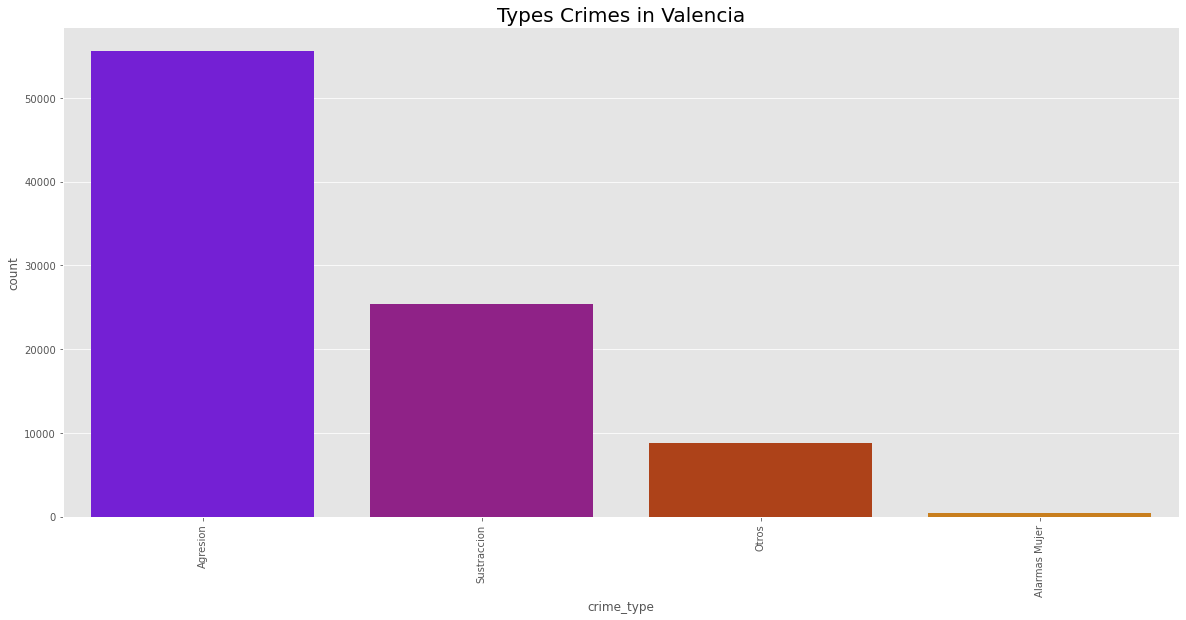

In [158]:
# Different categories of crime
plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('ggplot')

sns.countplot(d_copy['crime_type'], palette = 'gnuplot')
plt.title('Types Crimes in Valencia', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

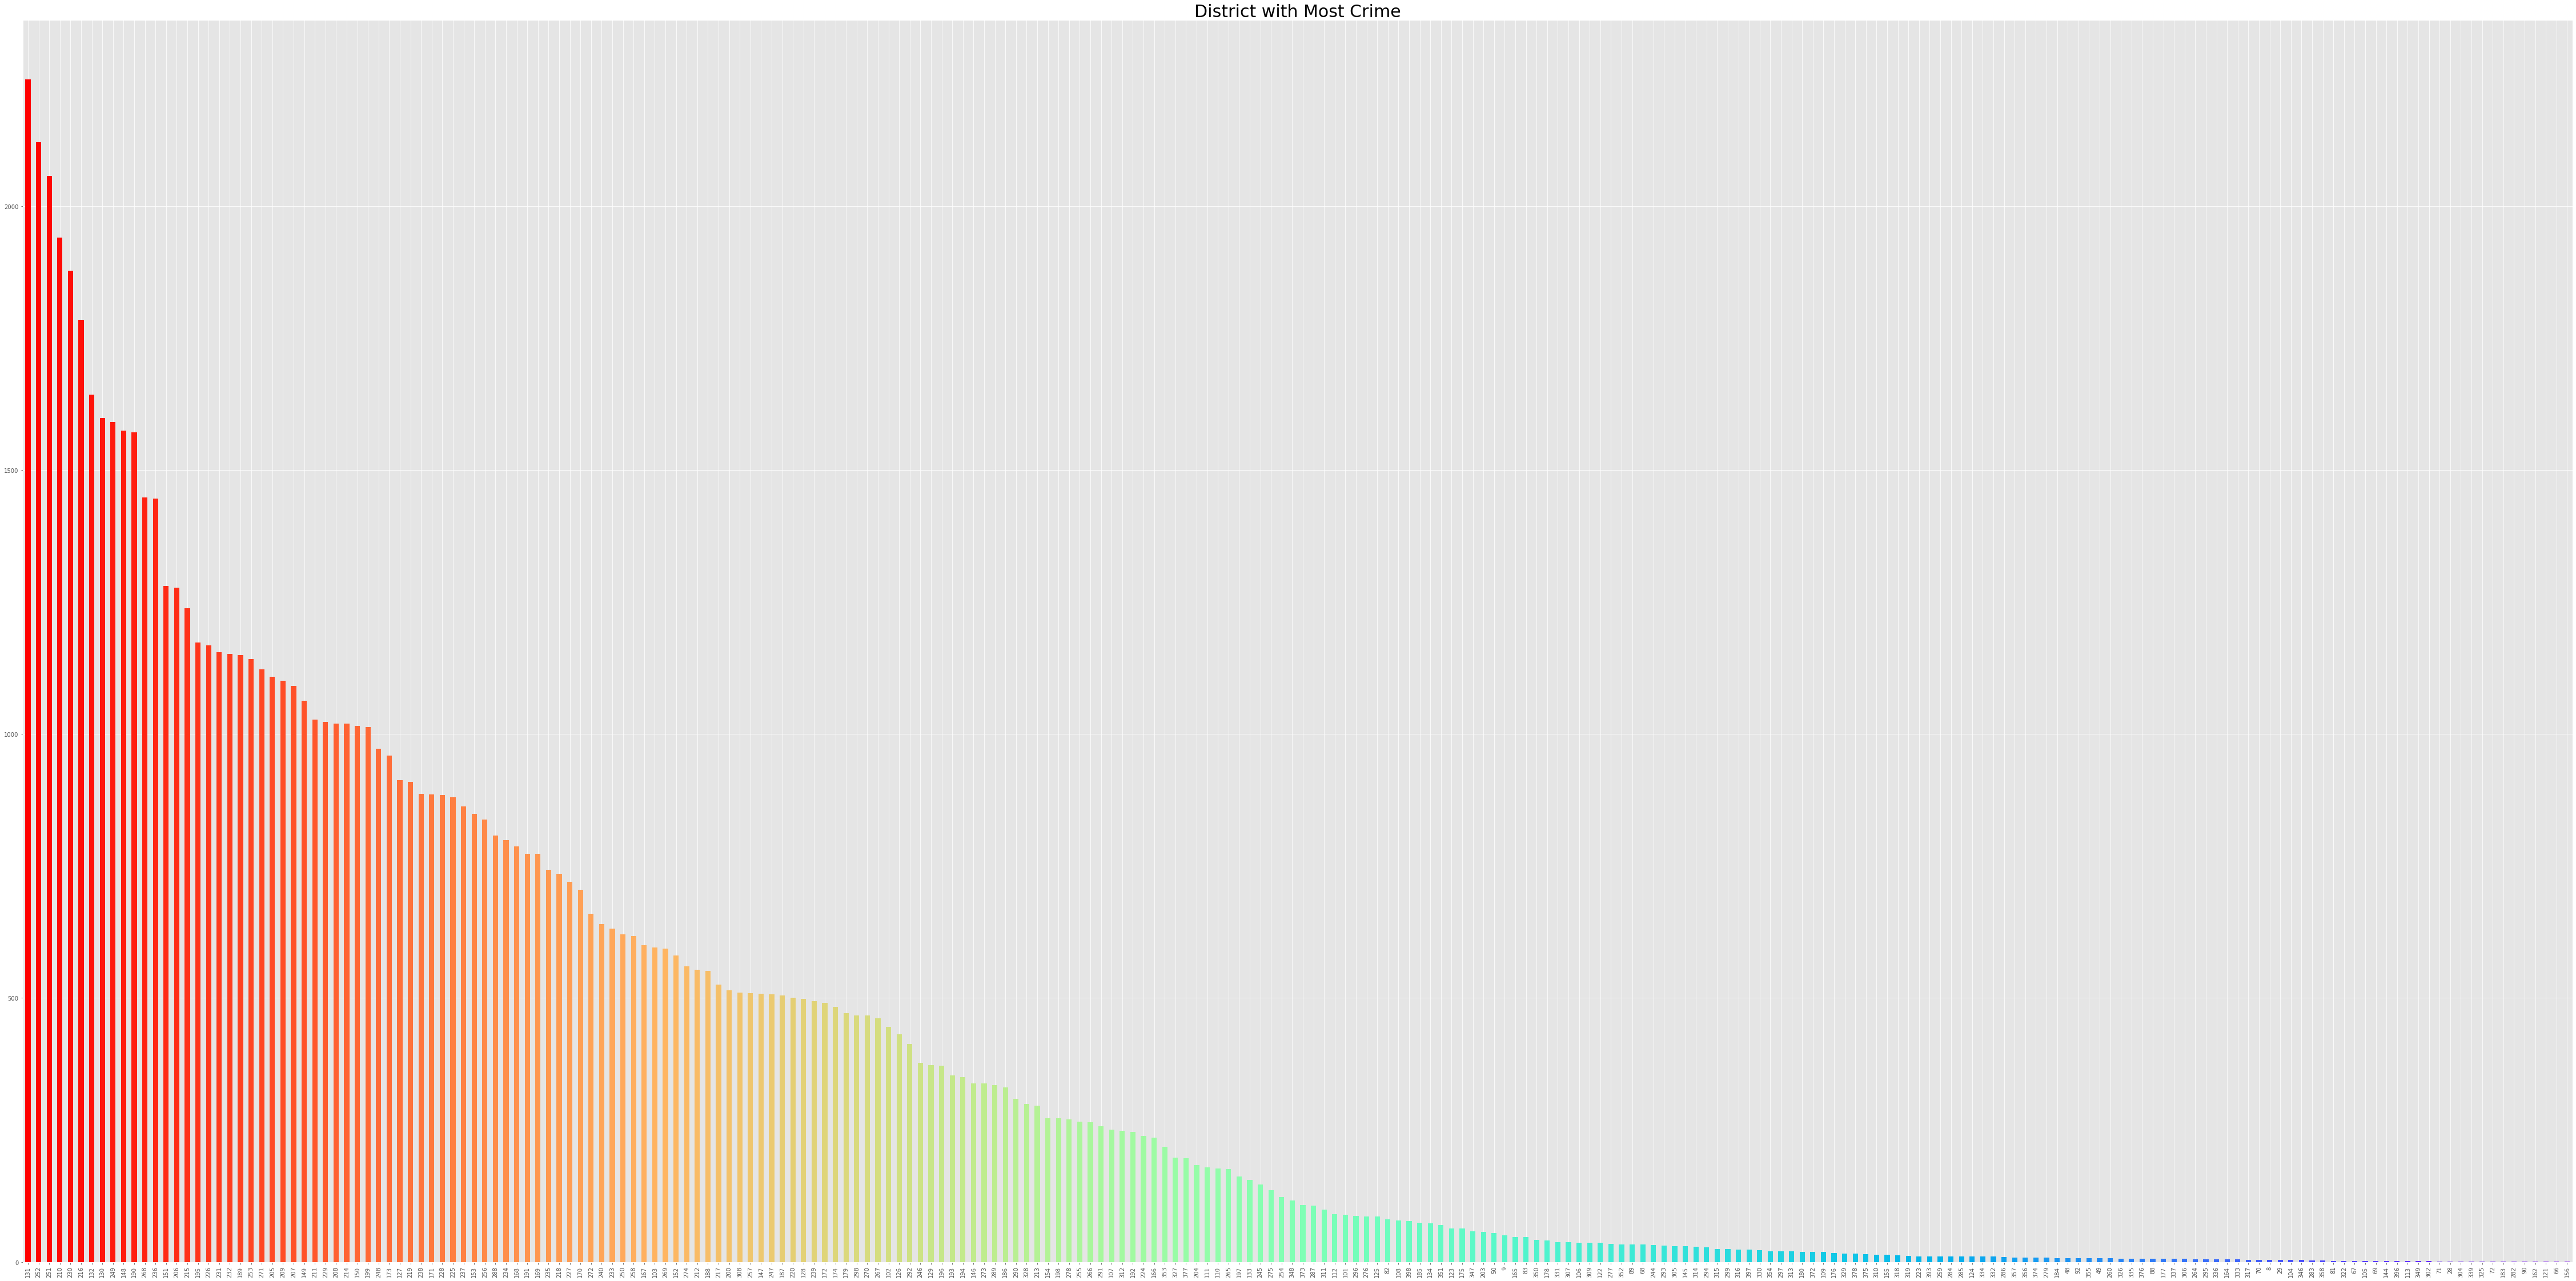

In [159]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (80, 40)
plt.style.use('ggplot')

color = plt.cm.rainbow_r(np.linspace(0, 1, 240))
d_copy['grid_id'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

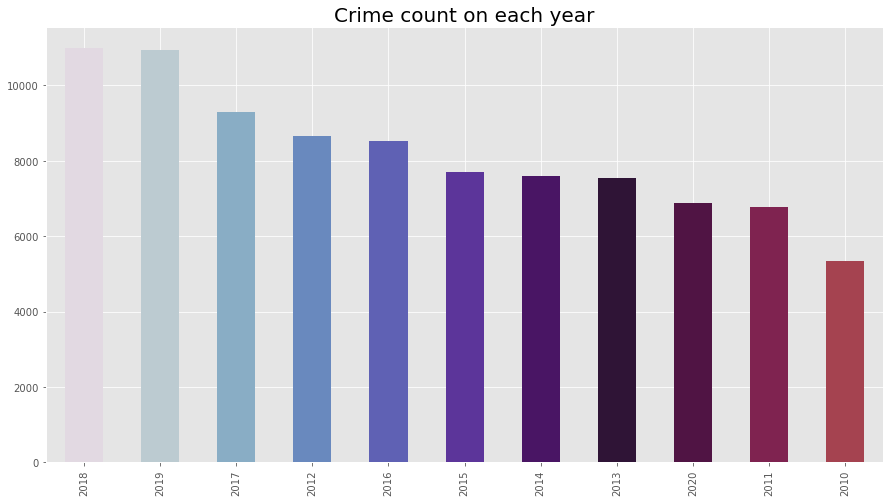

In [160]:
# Regions with count of crimes for day

plt.style.use('ggplot')

color = plt.cm.twilight(np.linspace(0, 1, 15))
d_copy['year'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each year',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

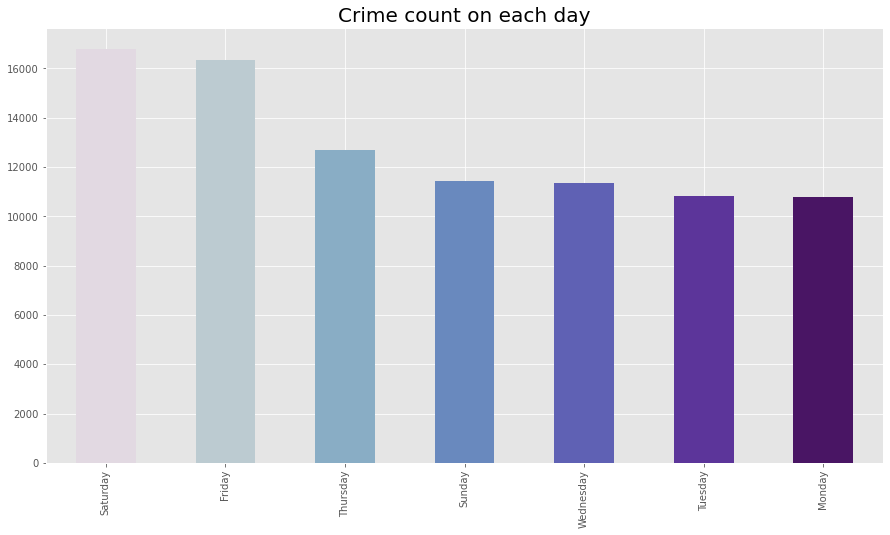

In [161]:

# Regions with count of crimes for day

plt.style.use('ggplot')

color = plt.cm.twilight(np.linspace(0, 1, 15))
d_copy['week_day_name'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

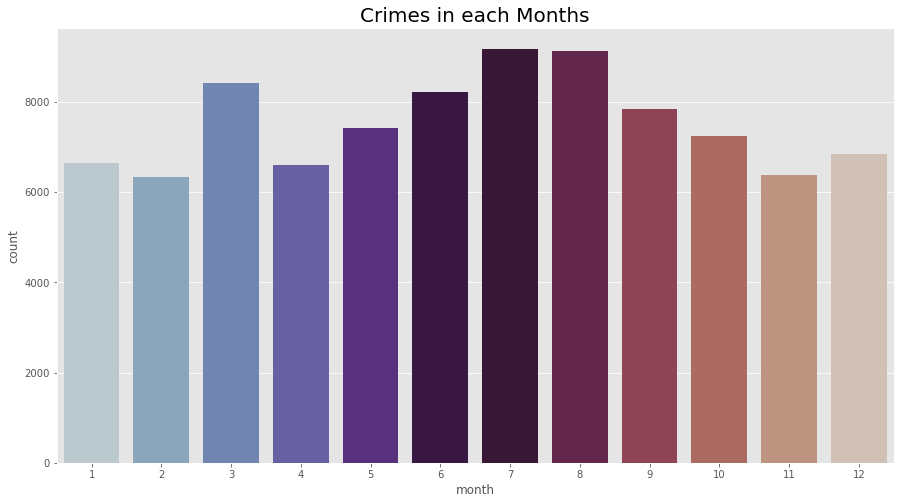

In [162]:
# Regions with count of crimes for month

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(d_copy['month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)
plt.show()

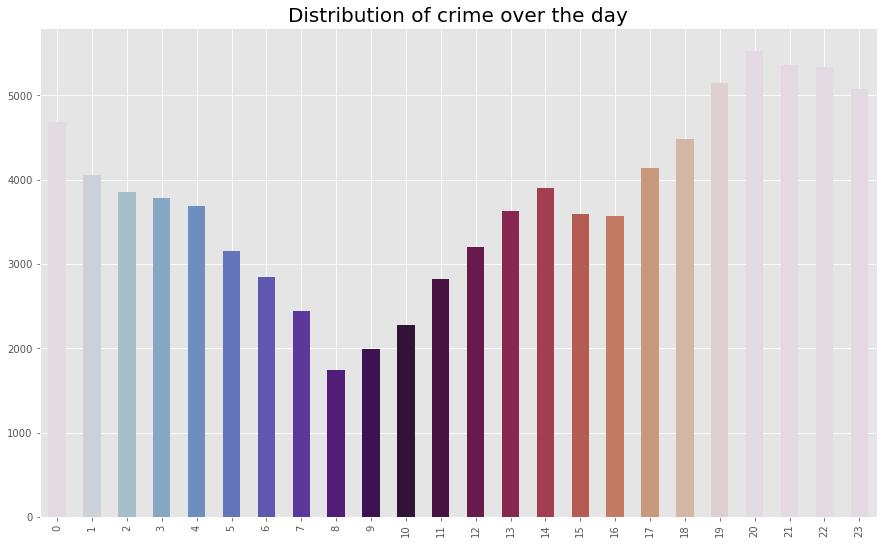

In [163]:
# Checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
d_copy['crime_hour'].value_counts().sort_index().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [164]:
d_copy_ = d_copy

#### Once the types of crimes have been checked, let's transform them into numerical values, this process is known as data normalization, we can apply a normalization to columns that have very different values, ie the difference between the values of different columns are very high

In [168]:
d_copy_["crime_type"].replace({"Agresion": 1, "Sustraccion": 2, "Otros": 2, "Alarmas Mujer": 2}, inplace=True)

#### We visualize the data header

In [169]:
d_copy_.head()

### We select the characteristics with which we are going to work

In [171]:
d_copy_ = d_copy_[['crime_lon', 'crime_lat','atm_dist', 'bank_dist', 'bar_dist', 'cafe_dist', 'industrial_dist','market_dist', 'nightclub_dist', 'police_dist', 'pub_dist','restaurant_dist', 'taxi_dist', 'grid_id', 'crime_type']]

In [172]:
d_copy_.index.name = 'date'

In [173]:
d_copy_ = d_copy_.sort_index(ascending=True)

In [174]:
d_copy_['dates'] = d_copy_.index

In [175]:
date_time = pd.to_datetime(d_copy_.pop('dates'), format='%Y.%m.%d %H:%M:%S')

In [176]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [177]:
day = 24*60*60
year = (365.2425)*day

d_copy_['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
d_copy_['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
d_copy_['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
d_copy_['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [178]:
d_copy_[d_copy_.index.duplicated()]

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,crime_type,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,
2012-03-19 06:57:03,-0.379654,39.466160,598.000513,125.1431,30.6531,148.04660,538.5129,747.5773,413.7206,531.1987,400.7809,91.2691,197.6894,230,1,0.999917,0.012871,0.974144,0.225929
2013-04-20 08:34:05,-0.402760,39.469212,1762.197219,48.0799,792.7089,547.79910,972.7598,374.6018,1183.9601,341.9344,748.7157,86.0415,922.6048,206,1,0.988962,-0.148169,0.949593,-0.313487
2014-02-22 19:44:06,-0.401489,39.472393,1629.596526,262.2885,843.8469,381.82180,945.7711,711.4978,1120.5158,524.9492,873.7241,147.0667,597.1472,206,1,-0.981544,0.191237,0.791739,0.610860
2017-05-27 16:35:20,-0.354198,39.463661,562.806276,282.8062,262.8374,246.98830,203.0767,251.0388,1623.4592,1380.1563,411.4560,180.6162,298.4951,234,1,-0.627057,-0.778973,0.572183,-0.820126
2017-05-28 12:26:53,-0.378705,39.465237,536.388562,248.2265,162.0555,264.22390,411.0017,754.1727,288.6730,662.6366,394.0230,188.1267,190.5966,230,1,0.395212,-0.918590,0.560451,-0.828187
2017-08-17 09:19:37,-0.369783,39.493935,238.511880,237.5754,857.8042,235.93030,621.6962,1119.6978,1088.7839,500.8922,557.0647,722.1415,139.2902,132,1,0.940263,-0.340448,-0.714743,-0.699387
2018-07-30 19:23:05,-0.375938,39.469082,303.891259,37.2363,127.0976,74.10690,574.2763,569.0359,504.4933,755.9687,80.8354,40.6288,175.7271,210,1,-0.987055,-0.160384,-0.470312,-0.882500
2019-03-24 06:54:32,-0.404034,39.469231,1888.666596,130.1889,840.8572,665.07310,1099.4784,380.9888,1310.8789,455.8102,637.3794,208.8169,945.3289,205,1,0.999716,0.023851,0.988179,0.153305
2019-05-14 06:02:08,-0.376621,39.467300,463.645205,68.3953,147.5292,82.19900,420.3750,689.9701,360.9336,754.7970,110.7059,74.9863,82.7055,230,1,0.870642,0.491917,0.750428,-0.660952


In [179]:
d_copy_ = d_copy_[~d_copy_.index.duplicated(keep='first')]

In [180]:
d_copy_[d_copy_.index.duplicated()]

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,crime_type,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,


In [181]:
d_copy_.index = d_copy_.index.round('10min')

In [182]:
d_copy_ = d_copy_[~d_copy_.index.duplicated(keep='first')]

In [183]:
d_copy_ = d_copy_.asfreq(freq='10min')

In [184]:
d_copy_

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,crime_type,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0,1.0,-0.106119,0.994353,0.004870,0.999988
2010-01-01 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0,1.0,-0.999896,0.014398,-0.991250,0.131996
2020-10-08 20:10:00,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0,1.0,-0.999104,0.042312,-0.991240,0.132072
2020-10-08 20:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
d_copy_.fillna(0, inplace=True)

In [186]:
d_copy_

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,crime_type,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0,1.0,-0.106119,0.994353,0.004870,0.999988
2010-01-01 00:50:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:00:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:10:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0,1.0,-0.999896,0.014398,-0.991250,0.131996
2020-10-08 20:10:00,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0,1.0,-0.999104,0.042312,-0.991240,0.132072
2020-10-08 20:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


### Select index train, test, validation

In [187]:
# range train data
len_train = len(d_copy_.loc['2010-01-01':'2019-12-31'])

In [188]:
# range test data
len_test = len(d_copy_.loc['2020-01-01':'2020-01-31'])

In [189]:
# range validation data
len_val = len(d_copy_.loc['2020-02-01':'2020-02-29'])

In [190]:
print(len_train,len_test,len_val)

525884 4464 4176


In [191]:
print(len_train)
print(len_train+len_test)
print(len_train+len_test+1)
print(len_train+len_test+len_val)
print(len_train+len_test+len_val+1)


525884
530348
530349
534524
534525


#### We graph all the variables, to observe the evolution of the variables over time

In [192]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [194]:
d_copy_

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,crime_type,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0,1.0,-0.106119,0.994353,0.004870,0.999988
2010-01-01 00:50:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:00:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:10:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-01 01:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0,1.0,-0.999896,0.014398,-0.991250,0.131996
2020-10-08 20:10:00,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0,1.0,-0.999104,0.042312,-0.991240,0.132072
2020-10-08 20:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [199]:
#y_ = d_copy_.iloc[:,0].values
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(d_copy_.iloc[:,-5])

In [200]:
y_cat

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [202]:
d_copy_['No crime'] = y_cat[:,0]
d_copy_['Crime'] = y_cat[:,1]
d_copy_['Agresion'] = y_cat[:,2]

In [56]:
Values_ML = d_copy_.iloc[:,2:].values
Values = d_copy_.iloc[:,2:].values

In [57]:
y = d_copy_.iloc[:,0:2]

In [58]:
y = y.values
y = np.absolute(y)

In [59]:
# ensure all data is float
Values_ML = Values_ML.astype('float32')
Values = Values.astype('float32')
Values_ML

array([[2.7003025e+03, 2.8223101e+01, 3.8643700e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.9626794e+02, 3.0781030e+02, 2.9572211e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [61]:
# normalize features
scaler_ML = MinMaxScaler(feature_range=(0, 1))
Values_ML[:,:] = scaler_ML.fit_transform(Values_ML[:,:])
scaled_ML = Values_ML
scaled_ML

array([[0.5580467 , 0.00827284, 0.00887875, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10255913, 0.09022629, 0.06794492, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [62]:
float_values_ml = Values_ML

In [63]:
print(float_values_ml.shape, y.shape)

(566473, 20) (566473, 2)


In [64]:
X_train, Y_train = float_values_ml[0:len_train,:], y[0:len_train,:]
X_test, Y_test = float_values_ml[len_train + 1:len_train + len_test,:], y[len_train + 1:len_train + len_test,:]
X_val, Y_val = float_values_ml[len_train + len_test + 1:len_train + len_test + len_val,:], y[len_train + len_test + 1:len_train + len_test + len_val,:]

In [65]:
print(X_train, Y_train)

[[0.5580467  0.00827284 0.00887875 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]] [[ 0.39068499 39.43516922]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


In [66]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(525884, 20) (525884, 2) (4463, 20) (4463, 2) (4175, 20) (4175, 2)


In [67]:
def NormalizeMult(data, set_range):
    '''
         Return the normalized data and the maximum and minimum values
    '''
    normalize = np.arange(2*data.shape[1], dtype='float64')
    normalize = normalize.reshape(data.shape[1], 2)
 
    for i in range(0, data.shape[1]):
        if set_range == True:
            list = data[:, i]
            listlow, listhigh = np.percentile(list, [0, 100])
        else:
            if i == 0:
                listlow = -90
                listhigh = 90
            else:
                listlow = -180
                listhigh = 180
 
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
 
        delta = listhigh - listlow
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data, normalize

In [70]:
def FNormalizeMult(data,normalize):
 
    data = np.array(data, dtype='float64')
         #Column
    for i in range(0, data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        print("listlow, listhigh, delta", listlow, listhigh, delta)
                 #Row 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = data[j, i]*delta + listlow
 
    return data

### Baseline

In [72]:
# Algorithms
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

#clf = MultiOutputRegressor(Ridge(random_state=1)).fit(X_train, y_train)

In [73]:
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                         max_depth=max_depth,
                                                         random_state=0))
regr_multirf.fit(X_train, Y_train)
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                               random_state=2)
regr_rf.fit(X_train, Y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)#
_rf = regr_rf.predict(X_test)

In [74]:
# Predict on new data
y_multirf_val = regr_multirf.predict(X_val)
y_rf_val = regr_rf.predict(X_val)

In [75]:
print(regr_multirf.score(X_test, Y_test))
print(regr_rf.score(X_test, Y_test))

In [76]:
print(regr_multirf.score(X_val, Y_val))
print(regr_rf.score(X_val, Y_val))

### Times Series

In [77]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
Values[:,:] = scaler.fit_transform(Values[:,:])
scaled = Values

In [78]:
# normalize features
scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)
y = np.round(y, 4)
y

array([[0.9094, 0.9976],
       [0.    , 0.    ],
       [0.    , 0.    ],
       ...,
       [0.    , 0.    ],
       [0.    , 0.    ],
       [0.9095, 0.9987]])

In [79]:
float_data = scaled

In [80]:
num_classes = 2

In [81]:
x_train, y_train = float_data[0:len_train,:], y[0:len_train]
x_test, y_test = float_data[len_train + 1:len_train + len_test,:], y[len_train + 1:len_train + len_test]
x_val, y_val = float_data[len_train + len_test + 1:len_train + len_test + len_val,:], y[len_train + len_test + 1:len_train + len_test + len_val]

In [82]:
print(x_train, y_train)

[[0.5580467  0.00827284 0.00887875 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]] [[0.9094 0.9976]
 [0.     0.    ]
 [0.     0.    ]
 ...
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]]


In [90]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
x_test = X_test.reshape((X_test.shape[0] ,X_test.shape[1], 1))
x_val = X_val.reshape((X_val.shape[0] ,X_val.shape[1], 1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


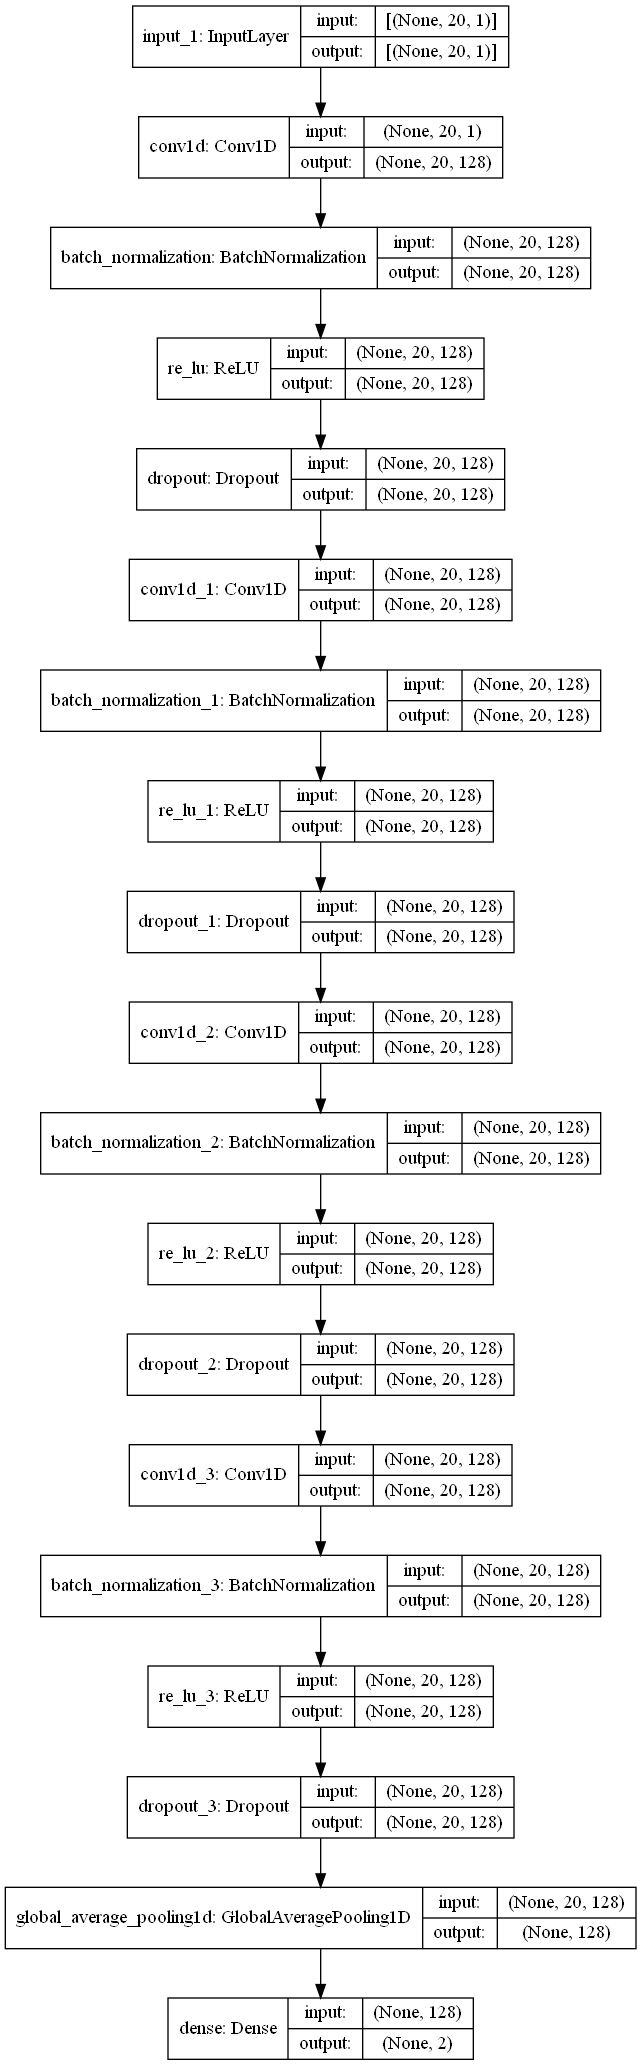

In [95]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.python.keras.models import Sequential
from keras.models import Sequential, Model
from keras.layers import Embedding, Input
from keras import layers
from keras import regularizers
from keras import optimizers

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    #conv1 = keras.layers.MaxPooling1D()(conv1)
    conv1 = keras.layers.Dropout(0.2)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    #conv2 = keras.layers.MaxPooling1D()(conv2)
    conv2 = keras.layers.Dropout(0.2)(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    #conv3 = keras.layers.MaxPooling1D()(conv3)
    conv3 = keras.layers.Dropout(0.2)(conv3)
    
    conv4 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    conv4 = keras.layers.ReLU()(conv4)
    #conv4 = keras.layers.MaxPooling1D()(conv4)
    conv4 = keras.layers.Dropout(0.2)(conv4)

    gap = keras.layers.GlobalAveragePooling1D()(conv4)

    output_layer = keras.layers.Dense(num_classes, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))(gap)
    

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model_cnn = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model_cnn, show_shapes=True)


In [96]:
def parameters(model):
    epochs = 50
    batch_size = 32

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "lat_lon_CNN_one_hot.h5", save_best_only=True, monitor="loss"
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="loss", factor=0.5, patience=20, min_lr=0.0001
        ),
        keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
    ]
    adam = keras.optimizers.Adam(lr=0.01)
    model.compile(
        optimizer=adam,
        loss="mse",
        metrics=["accuracy"],
    )
    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        #validation_split=0.2,
        #shuffle = True,
        verbose=1,
    )
    return model, history

In [97]:
model_CNN, history_CNN = parameters(model_cnn)

Epoch 1/50
525884/525884 [==============================] - 213s 405us/sample - loss: 0.0431 - acc: 0.9134
Epoch 2/50
525884/525884 [==============================] - 220s 419us/sample - loss: 3.1405e-04 - acc: 0.9995
Epoch 3/50
525884/525884 [==============================] - 220s 419us/sample - loss: 3.0396e-04 - acc: 0.9993
Epoch 4/50
525884/525884 [==============================] - 220s 418us/sample - loss: 2.6195e-04 - acc: 0.9993
Epoch 5/50
525884/525884 [==============================] - 221s 421us/sample - loss: 2.5977e-04 - acc: 0.9993
Epoch 6/50
525884/525884 [==============================] - 230s 438us/sample - loss: 3.4292e-04 - acc: 0.9993
Epoch 7/50
525884/525884 [==============================] - 228s 434us/sample - loss: 2.5823e-04 - acc: 0.9994
Epoch 8/50
525884/525884 [==============================] - 227s 432us/sample - loss: 2.5864e-04 - acc: 0.9995
Epoch 9/50
525884/525884 [==============================] - 225s 427us/sample - loss: 2.5988e-04 - acc: 0.9996
Epoch

In [99]:
#from tensorflow import keras

#model_CNN = keras.models.load_model("lat_lon_CNN_one_hot.h5", compile=False)

In [100]:
test_loss, test_acc = model_CNN.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4463/4463 [==============================] - 1s 135us/sample - loss: 2.1050e-04 - acc: 1.0000
Test accuracy 1.0
Test loss 0.0002104954482580239


In [101]:
test_loss, test_acc = model_CNN.evaluate(x_val, y_val)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4175/4175 [==============================] - 0s 115us/sample - loss: 2.1183e-04 - acc: 1.0000
Test accuracy 1.0
Test loss 0.0002118276969270368


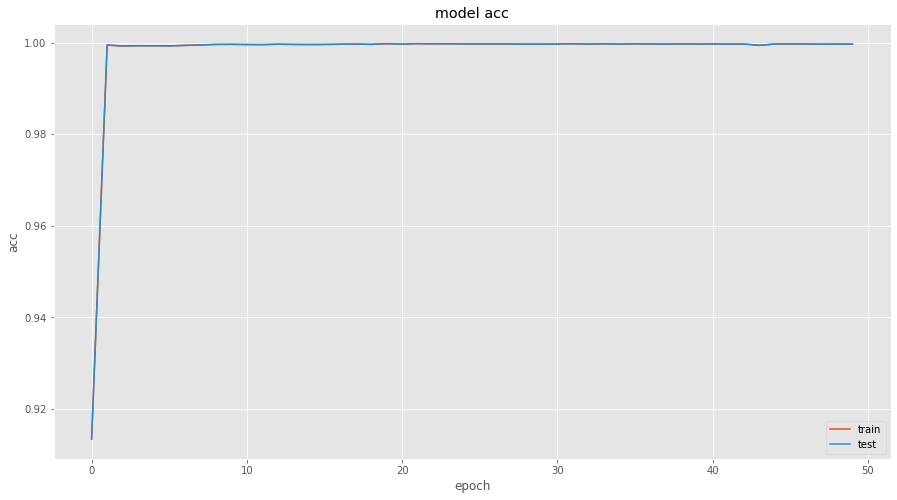

In [103]:
metric = "acc"
plt.figure()
plt.plot(history_CNN.history[metric])
plt.plot(history_CNN.history[metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "test"], loc="best")
plt.show()
plt.close()

In [128]:
from sklearn.metrics import classification_report
predict_y = model_CNN.predict(x_test)
#report_test = classification_report(y_test, predict_y)
print(predict_y, y_test )

[[0.        0.       ]
 [0.8907654 0.9974752]
 [0.        0.       ]
 ...
 [0.        0.       ]
 [0.8435343 0.9947631]
 [0.9083727 0.9990895]] [[0.     0.    ]
 [0.9056 0.9987]
 [0.     0.    ]
 ...
 [0.     0.    ]
 [0.8442 0.9982]
 [0.9116 0.9991]]


In [129]:
from sklearn.metrics import classification_report
predict_y_val = model_CNN.predict(x_val)
#report_test = classification_report(y_test[:], predict_y[:,0])
print(predict_y_val, y_val)

[[0.8729594  0.9958427 ]
 [0.88500494 0.9969471 ]
 [0.         0.        ]
 ...
 [0.9623482  1.0040381 ]
 [0.         0.        ]
 [0.92324424 1.0005789 ]] [[0.8804 0.9984]
 [0.8897 0.9981]
 [0.     0.    ]
 ...
 [0.9707 0.9992]
 [0.     0.    ]
 [0.931  0.9983]]


In [130]:
inv_pred_test = scaler.inverse_transform(predict_y)
print(inv_pred_test)
inv_test = scaler.inverse_transform(y_test)
print(inv_test)

[[ 0.          0.        ]
 [ 0.3826762  39.43115   ]
 [ 0.          0.        ]
 ...
 [ 0.          0.        ]
 [ 0.3623855  39.323936  ]
 [ 0.39024034 39.49496   ]]
[[ 0.          0.        ]
 [ 0.38904919 39.47956603]
 [ 0.          0.        ]
 ...
 [ 0.          0.        ]
 [ 0.36267152 39.45980055]
 [ 0.39162681 39.49537841]]


In [131]:
inv_pred_val = scaler.inverse_transform(predict_y_val)
print(inv_pred_val)
inv_val = scaler.inverse_transform(y_val)
print(inv_val)

[[ 0.37502664 39.366615  ]
 [ 0.38020146 39.41027   ]
 [ 0.          0.        ]
 ...
 [ 0.41342843 39.690586  ]
 [ 0.          0.        ]
 [ 0.3966292  39.55384   ]]
[[ 0.37822317 39.46770674]
 [ 0.38221849 39.45584745]
 [ 0.          0.        ]
 ...
 [ 0.41701639 39.4993315 ]
 [ 0.          0.        ]
 [ 0.39996112 39.46375364]]


In [141]:
#predict_y = np.around(predict_y)
#predict_y_val = np.around(predict_y_val)


dataset_test = pd.DataFrame({'Predict_lon': inv_pred_test[:,0]*-1, 'Predict_lat': inv_pred_test[:,1]})
dataset_val = pd.DataFrame({'Predict_lon': inv_pred_val[:,0]*-1, 'Predict_lat': inv_pred_val[:,1]})
#print(dataset_test)
#print(dataset_val)

dataset_join = dataset_test.append(dataset_val)
#dataset_join = dataset_join.values

In [142]:
dataset_join

,Predict_lon,Predict_lat
0,-0.000000,0.000000
1,-0.382676,39.431149
2,-0.000000,0.000000
3,-0.340536,39.311802
4,-0.000000,0.000000
...,...,...
4170,-0.390043,39.502865
4171,-0.000000,0.000000
4172,-0.413428,39.690586
4173,-0.000000,0.000000


In [144]:
dataset_join.to_excel(r'/data/lat_lon_result_CNN_tree_types.xlsx') 